<center><br>

# Term Project
    
</center>


<div style="text-align: right; width: 15%; margin-left: auto;">
    
Jon Cannaday <br>
Big Data <br>
10/29/2024  

</div>


# Architecture
<br>

<div style="width: 100%; border-bottom: 1px solid black;"></div>

This will the road map the term project will follow. Starting with the data source, moving the data source using nifi, exporting it into hdfs, then using spark to move the data once more into Hive.

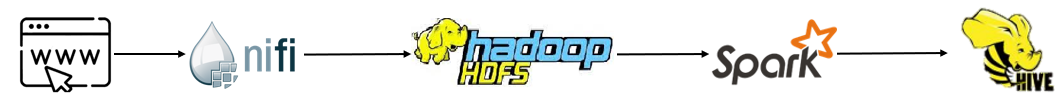

# Data Source
<br>

<div style="width: 100%; border-bottom: 1px solid black;"></div>

Using Python we will briefly look at the selected csv data set of titanic data.

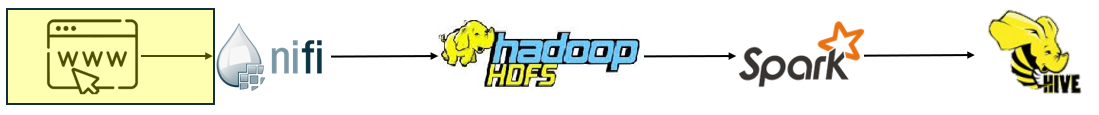

In [1]:
import pandas as pd
file = "https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv"
data = pd.read_csv(file)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


# Nifi
<br>

<div style="width: 100%; border-bottom: 1px solid black;"></div>

In this section we will document the steps taken to pull the data from github using NiFi.

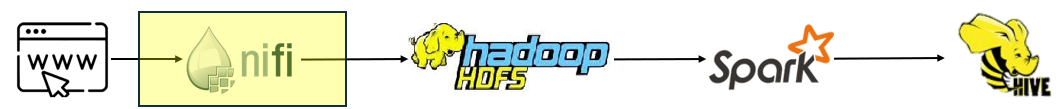

Used the JSON template from the assignment and uploaded a saved copy into Nifi.

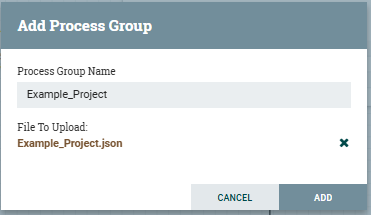

This is what the JSON file uploaded into Nifi loked like.

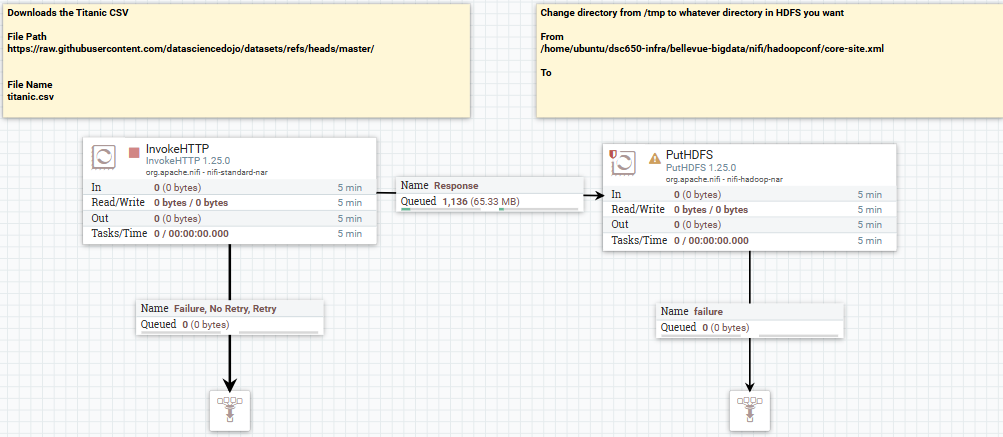

Then changed the data source to the titanic dataset.

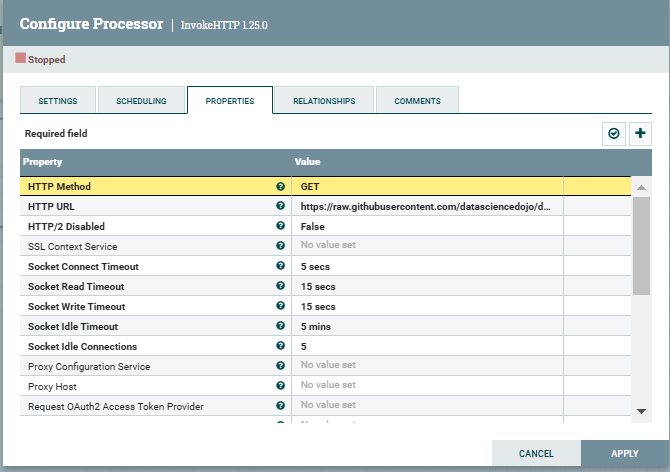

Checked to see if the data came through.

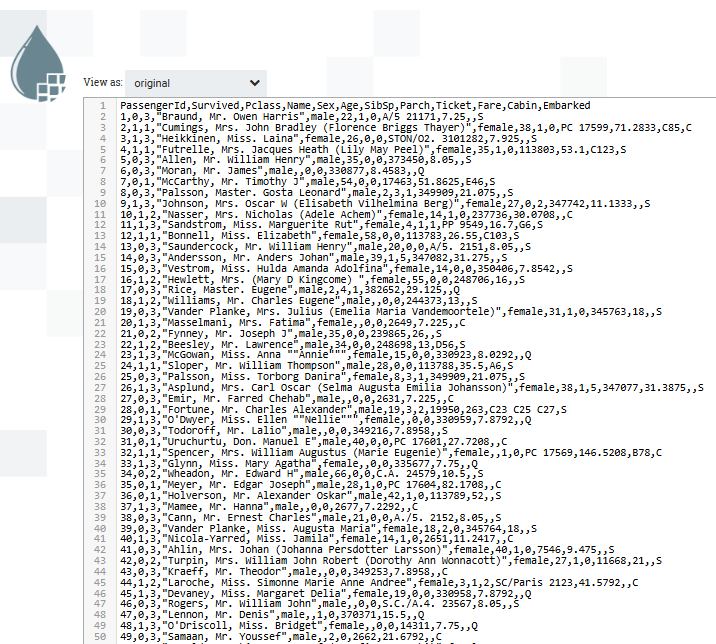

# HDFS
<br>

<div style="width: 100%; border-bottom: 1px solid black;"></div>

In this section we will take that data imported from Github using Nifi and export that into HDFS.

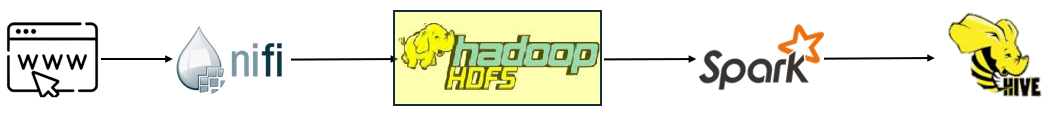

Sine I deleted nifi and redownleaded it, an alt path was needed to access the cofig fie.

mkdir -p ~/bellevue-bigdata/nifi/hadoopconf && \
cd ~/bellevue-bigdata/nifi/hadoopconf && \
wget https://raw.githubusercontent.com/bellevue-university/dsc650-infra/refs/heads/main/bellevue-bigdata/nifi/hadoopconf/core-site.xml && \
hostname=$(hostname -f) && \
sed -i '' "s/HOST/$hostname/g" core-site.xml && \
chmod -R 777 ~/bellevue-bigdata/nifi

Then the Config was changed to map to out HDFS path.

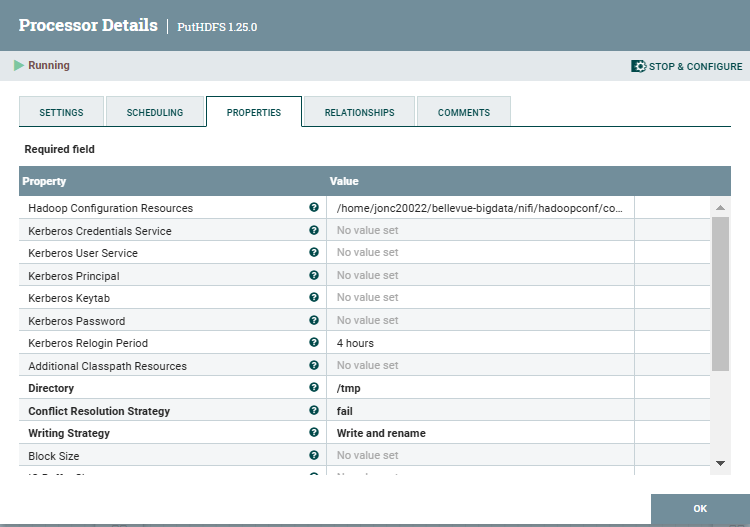

The final view looked like this.

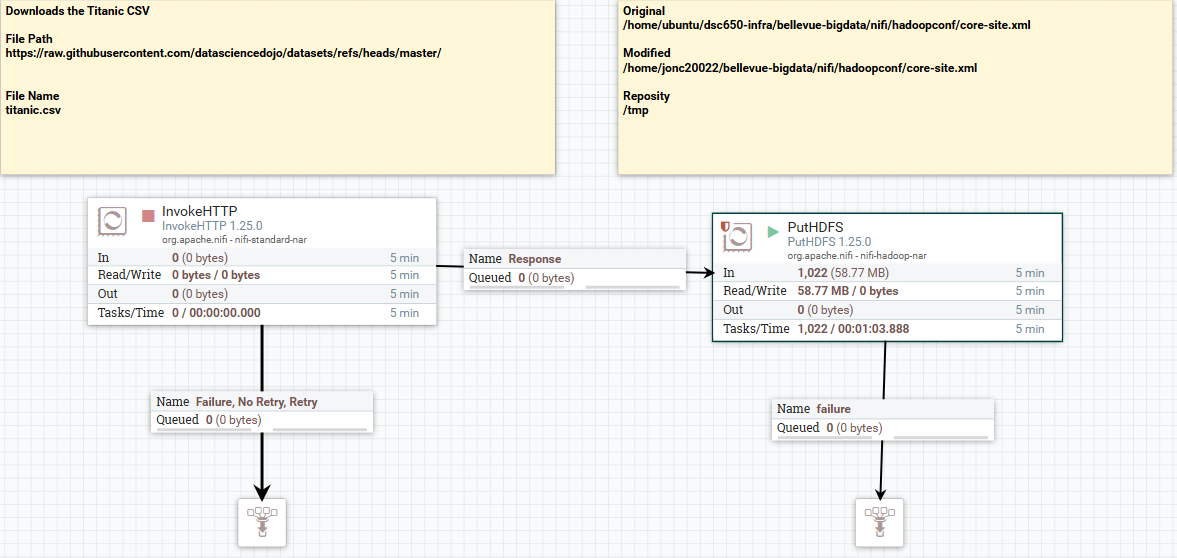

Checked to see if the data was uploaded.

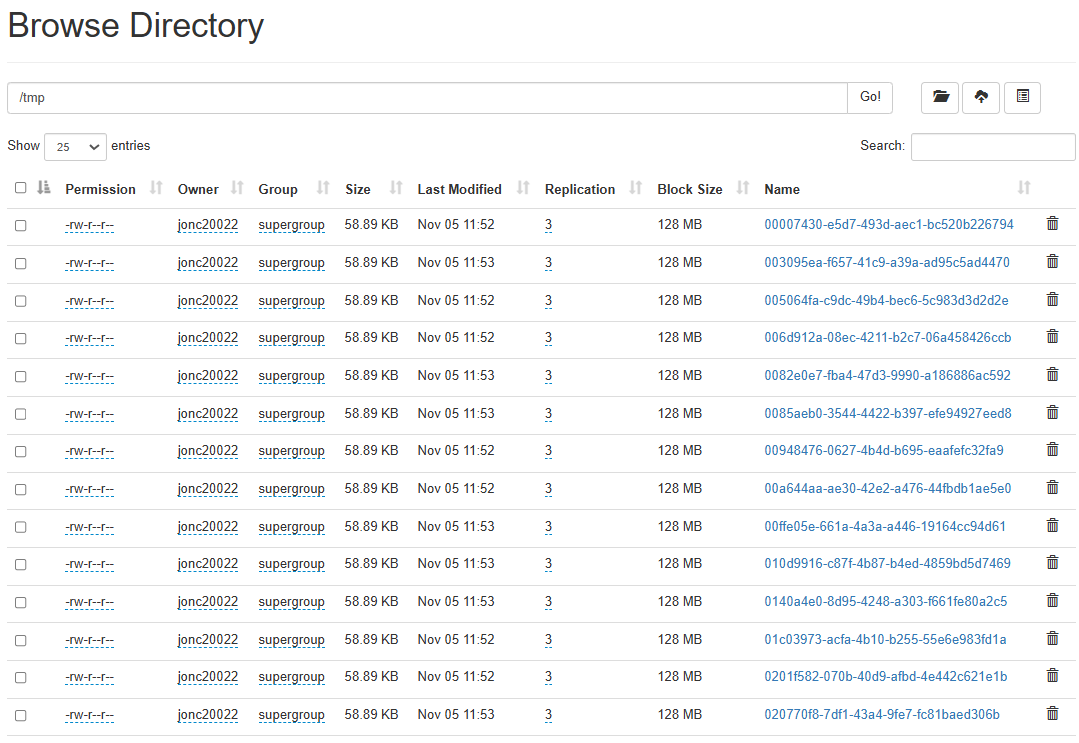

Also found them in the MAster doc container.

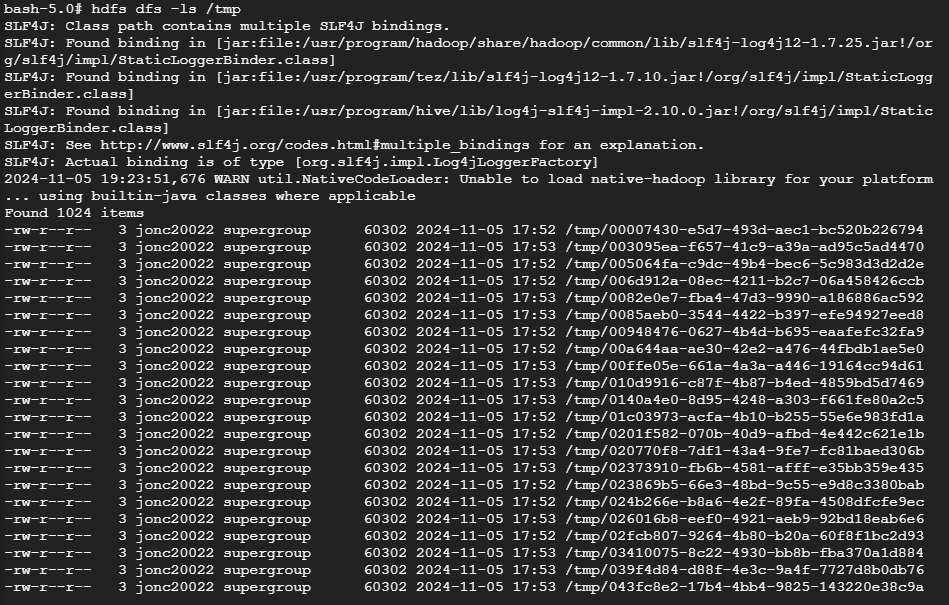

# Spark
<br>

<div style="width: 100%; border-bottom: 1px solid black;"></div>

Using Spark we will write scripts that pull data from HDFS and load that into Hive.

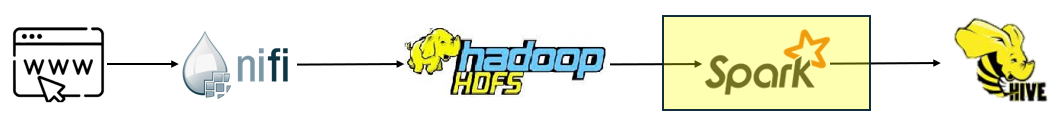

The following code took the data from hdfs and put it into a spark opject.

In [ ]:
df = spark.read.format('csv').option('header', 'true')
    .load('/tmp/00007430-e5d7-493d-aec1-bc520b226794')
df.show()  

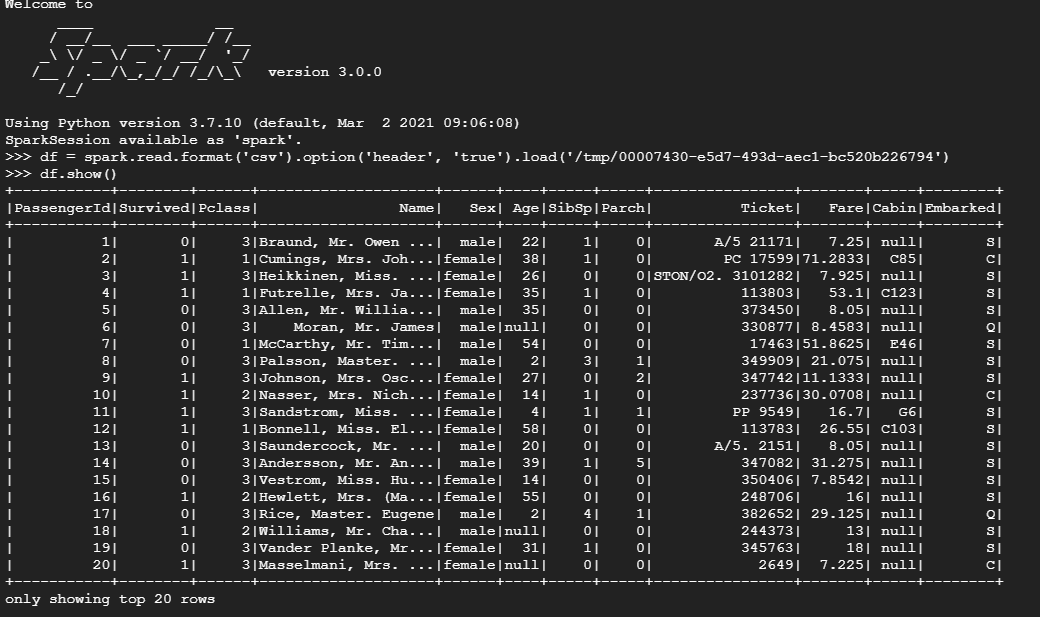

# Hive
<br>

<div style="width: 100%; border-bottom: 1px solid black;"></div>

Finally we will see in Hive that the data is loaded correctly.

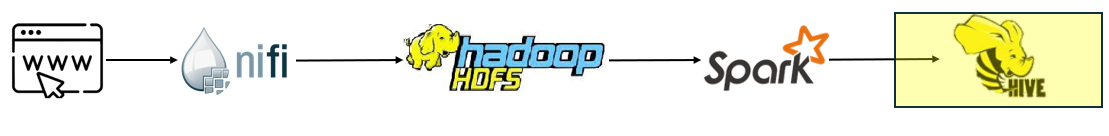

Finally we loaded the object into a hive database.

from pyspark.sql.functions import col

spark = SparkSession.builder \
    .appName("Titanc CSV to Hive") \
    .enableHiveSupport() \
    .getOrCreate()


df.write.mode("overwrite").saveAsTable("default.newtitanic")


spark.sql("SELECT * FROM default.newtitanic ").show()

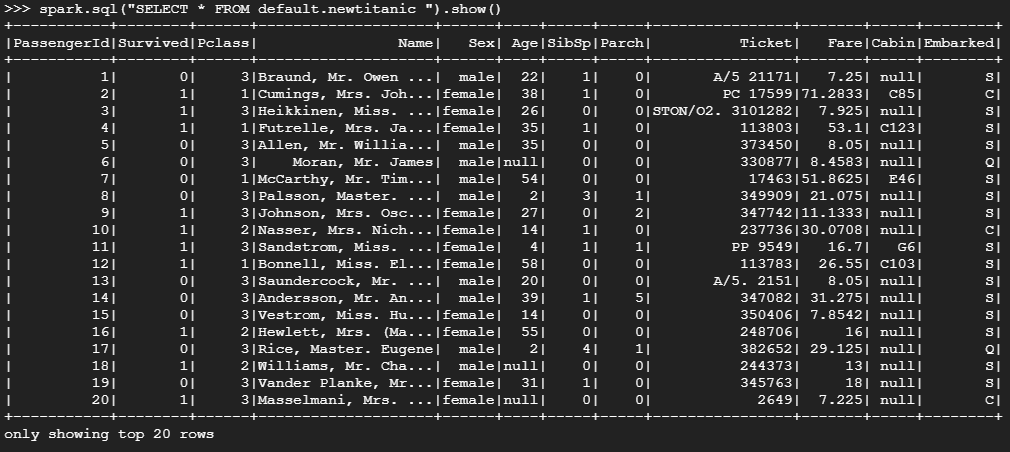

Then cleared the excess files broght in from Nifi to HDFS.

hdfs dfs -ls /tmp | grep -v "00007430-e5d7-493d-aec1-bc520b226794" | awk '{print $8}'


hdfs dfs -ls /tmp | grep -v "00007430-e5d7-493d-aec1-bc520b226794" | awk '{print $8}' | xargs -I {} hdfs dfs -rm -r {}


# Jon Cannaday
**Email:** jcannaday0319@gmail.com  •  **Phone:** (972) 979-8043


## SUMMARY
<div style="width: 100%; border-bottom: 1px solid black;"></div>
<br>
Accomplished business intelligence analyst approaching a decade working with statistical modeling, data analytics, and visualization development. Turnkey project scripting in Python, R, SQL, and M-Code. Fluent in software design reporting and interactive dashboards using Power BI, Python, and Excel.


## EDUCATION
<div style="width: 100%; border-bottom: 1px solid black;"></div>
<br>
**Bellevue University** - Bellevue, NE  
*Nov 2024*  
Master of Science, Data Science, GPA 4.0  
- Coursework: Statistics for Data Science, Data Mining, Predictive Analytics, Data Presentation and Visualization, Big Data, Applied Data Science.

**Dallas Baptist University** - Dallas, TX  
*Dec 2018*  
Bachelor of Science, Mathematics, GPA 3.47  
- Coursework: Differential Equations, Physics, Calculus 1, Calculus 2, Calculus 3, Abstract Algebra, Linear Algebra, Statistics.


## PROFESSIONAL EXPERIENCE
<div style="width: 100%; border-bottom: 1px solid black;"></div>
<br>
**Cinemark** - Plano, TX  
*Business Intelligence Analyst*  
*Jan 2023 – Present*  
- Developed decision tree models that achieved an 86% recall rate in identifying refunded transactions, leading to identification of high-risk customers and lowering refunds by $1 million per year.
- Built an Apriori model to analyze over 100,000 product combinations, optimizing targeted promotions and boosting product sales by $200,000 over the past month.
- Conducted statistical A/B testing on q-lines, price change effects, and seat selection, enhancing visibility and affirming leadership decisions.
- Engineered proximity-based data on 400+ theater locations, informing strategic placement decisions and increasing localized marketing.
- Designed and implemented full-stack Power BI solutions, centralizing reporting and enhancing data access for cross-departmental decision-making.

**Gateway Mortgage Bank** - Dallas, TX  
*Business Analyst*  
*Jan 2019 – Dec 2022*  
- Led system integration projects that consolidated corporate procedures, improving operational efficiency by 40%.
- Streamlined electronic mortgage delivery processes, cutting shipping costs by 10%.
- Developed a Margin Differential tool that eliminated processing error.
- Automated departmental tasks, reducing manual data retrieval efforts and increasing workflow.

**Dallas Baptist University** - Dallas, TX  
*Assistant Manager*  
*Jan 2016 – Dec 2018*  
- Managed and integrated a 1000+ item inventory, optimizing categorization and recording processes within the institutional database.
- Created Gantt timelines that facilitated on-schedule project completion for campus construction.
- Supervised contractors, ensuring adherence to project timelines and quality standards.


## SKILLS
<div style="width: 100%; border-bottom: 1px solid black;"></div>
<br>
**Programming languages:** Python, SQL, R, Excel, M-Code, DAX, C, Pandas, Matplotlib, GUI, Seaborn, Scikit-learn, NumPy, SciPy.  
**Computer software/frameworks:** Jupyter Notebooks, Git, Azure Data Warehouse, SSMS, SPSS, NiFi, HDFS, PySpark, Alteryx, Workday, Microsoft Excel, Power Query, Microsoft PowerPoint, Microsoft Word, Power BI, SharePoint.  
**Languages:** English, Spanish.  


## CERTIFICATES
<div style="width: 100%; border-bottom: 1px solid black;"></div>
<br>
Academic Research Foundations: Quantitative, Power BI Dataflows Essential Training, Learning Excel: Data Analysis, LinkedIn AI Academy AI-100: 1 Demystifying AI, Machine Learning with Logistic Regression in Excel, R, and Power BI, Python Projects, Applied Machine Learning: Algorithms, Excel: Statistical Process Control, Learning Minitab, Master Data Engineering, Microsoft Power BI Data Analyst Associate (PL-300) Cert Prep by Microsoft Press, Programming Foundations: Version Control with Git (2020), Advanced Predictive Modeling: Mastering Ensembles and Metamodeling, Applied Machine Learning: Feature Engineering, Data Science Foundations: Data Assessment for Predictive Modeling, Data Science Foundations: Data Mining in Python, Data Science Foundations: Data Mining in R, Machine Learning and AI Foundations: Prediction, Causation, and Statistical Inference, Power BI Essential Training, Predictive Analytics Essential Training: Data Mining, Predictive Analytics Essential Training: Estimating and Ensuring ROI, Regression Analysis Fundamentals, SPSS Statistics Essential Training, CompTIA Data+ (DA0-001) Cert Prep: 1 Data Concepts and Environments, CompTIA Data+ (DA0-001) Cert Prep: 2 Data Mining, CompTIA Data+ (DA0-001) Cert Prep: 3 Data Analysis, CompTIA Data+ (DA0-001) Cert Prep: 4 Visualization, CompTIA Data+ (DA0-001) Cert Prep: 5 Data Governance, Quality, and Controls, Complete Guide to Power BI for Data Analysts by Microsoft Press, Machine Learning & AI Foundations: Linear Regression, Machine Learning Foundations: Calculus, Machine Learning and AI Foundations: Classification Modeling, Machine Learning and AI Foundations: Clustering and Association, Machine Learning and AI Foundations: Decision Trees with KNIME, Machine Learning and AI Foundations: Decision Trees with SPSS, Machine Learning and AI: Advanced Decision Trees with SPSS, Python Statistics Essential Training, Machine Learning Foundations: Linear Algebra, Power BI for Beginners: Analysis of Data (Beta), Essential Power BI (Beta), Machine Learning Foundations: Probability, Power BI Data Analyst Associate (PL-300) Cert Prep: Cleaning, Transforming, and Loading Data in Power BI, Power BI Data Analyst Associate (PL-300) Cert Prep: Designing and Developing a Power BI Data Model, Power BI Data Analyst Associate (PL-300) Cert Prep: Managing Datasets in Power BI, Prepare for the Power BI Data Analyst Associate (PL-300) Certification, Advanced Pandas, NumPy Essential Training: 1 Foundations of NumPy, NumPy Essential Training: 2 MatPlotlib and Linear Algebra Capabilities, Python GUI Development with Tkinter, pandas Essential Training, Advanced Power BI: DAX Language, Formulas, and Calculations, Excel Statistics Essential Training: 1, Excel Statistics Essential Training: 2, Excel: Mastering Pivot Table Dashboards and Reports, Level Up: Advanced SQL, Statistical Analysis with Wolfram Language, Statistics Foundations 1: The Basics, Statistics Foundations 2: Probability, Statistics Foundations 3: Using Data Sets, Statistics Foundations 4: Advanced Topics, Yellow Belt Six Sigma, Introduction to Data Science Specialization, BLS, American Heart Association, Data Science Methodology, Databases and SQL for Data Science with Python, Introduction to Data Analysis using Microsoft Excel, SQL: A Practical Introduction for Querying Databases, Tools for Data Science.
